# Datasets

[![](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/ganegroup/workshop_nn/blob/main/02_datasets.ipynb)


## Obteniendo datos con tensorflow_datasets (tfds)

[TensorFlow Datasets](https://www.tensorflow.org/datasets?hl=es-419) es una colección de conjuntos de datos listos para usar con TensorFlow u otras plataformas de aprendizaje profundo. Todos los conjuntos de datos se presentan como `tf.data.Datasets`, que es una API que permite crear pipelines de ingestión de datos de manera sencilla y de alto rendimiento.

Para conjuntos de datos pequeños, la ventaja de utilizar `tfds` no es muy significativa, de hecho, la interfaz puede resultar demasiado complicada. Sin embargo, a medida que el conjunto de datos crece y ya no se puede cargar completamente en la memoria, se vuelve fundamental utilizar un sistema como este. En el aprendizaje profundo, la cantidad de datos suele ser crucial y, en general, cuanto más datos tengamos, mejor será el rendimiento. Por esta razón, se requieren rápidamente sistemas de pipelines como este.

Lo vamos a importar utilizando:

In [1]:
import tensorflow_datasets as tfds

## Buscar conjuntos de datos disponibles

Podemos obtener una lista de datasets disponibles utilizando `tfds.list_builders()`. Alternativamente podemos consultar el [catálogo disponible online](https://www.tensorflow.org/datasets/catalog/overview). 

Como pueden ver, hay conjuntos de datos de todo tipo: audio, imágenes, video, segmentación, etc. La recomendación es que, si tienen algún proyecto en mente, busquen conjuntos de datos que sean similares a lo que desean utilizar, pero que sean más simples (con una resolución limitada o un menor número de clases). Esto les permitirá implementar e iterar su modelo de manera más rápida, y les dará una idea de qué enfoques funcionan y cuáles no. De esta manera, pueden introducir gradualmente complejidad en su método.

Además, en muchos casos, es útil tener un conjunto de datos de referencia que se pueda utilizar como punto de referencia para evaluar si nuestro modelo es mejor que el de la competencia.

In [2]:
tfds.list_builders()[:10]  # Mostrar sólo los primeros 10

2023-07-01 14:27:57.798441: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 14:27:58.727444: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence']

La siguiente instrucción nos muestra el número de datasets disponibles

In [3]:
print(len(tfds.list_builders()))

1143


## Cargar un dataset

La forma más fácil de cargar un conjunto de datos es utilizando `tfds.load`. La función va a descargar los datos necesarios y compilarlos en un tipo de archivos llamado `tfrecord` que está pensado para la serialización eficiente de datos. Finalmente nos va a devolver uno (o varios) `tf.data.Dataset`. 

Opcionalmente le podemos pedir que nos provee información sobre el dataset. Esto va a ser útil para determinar la cantidad y el tipo de datos disponibles. Veamos un ejemplo cargando el dataset `cats_vs_dogs`

In [4]:
data, info = tfds.load('cats_vs_dogs', with_info=True)

2023-07-01 14:28:03.988564: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 14:28:03.992144: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 14:28:03.992276: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Veamos que nos muestra `info`

In [5]:
print(info)

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.0',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_path='/home/user/tensorflow_datasets/cats_vs_dogs/4.0.0',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=689.64 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=8>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, John (JD) and Howell, Jon and

Como vemos, el objeto `info`, además del nombre, la descripción y las fuentes del dataset, nos deja acceder por ejemplo a la propiedad `features` que nos va a decir el tipo de datos que se encuentran en el dataset

In [6]:
info.features

FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=uint8),
    'image/filename': Text(shape=(), dtype=string),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
})

Podemos deducir que el dataset contiene imágenes de tipo `uint8`, de tres canales (RGB) y dimensión espacial no especificada, además del nombre de archivo y la etiqueta de cada imagen.

Otra propiedad interesante es `splits` que nos informa cómo están separados los datos.

In [7]:
info.splits

{'train': <SplitInfo num_examples=23262, num_shards=8>}

Vemos que hay una sola separación llamada `train` (entrenamiento) que contiene 23262 ejemplos. ¿Pero qué son y para qué sirven estas separaciones de datos? Lo veremos en la próxima sección.

Finalmente, Podemos pedir que nos muestre algunos ejemplos para tener una idea más clara de los datos:

2023-07-01 14:28:04.858928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype int64 and shape [8]
	 [[{{node Placeholder/_3}}]]
2023-07-01 14:28:04.859142: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [8]
	 [[{{node Placeholder/_1}}]]


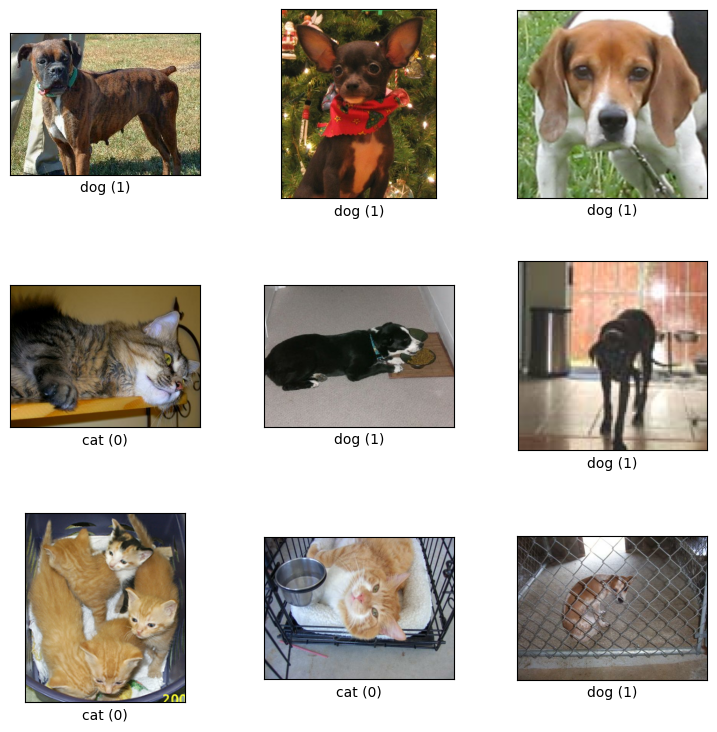

In [8]:
tfds.visualization.show_examples(data["train"], info);

## Sets de entrenamiento, validación y testeo

Un problema con los algoritmos automáticos es que de cierta forma son bastante tontos. Aunque aprenden de los datos, si los entrenamos y evaluamos utilizando exactamente los mismos datos, no podemos predecir cómo se desempeñarán en datos que nunca han encontrado anteriormente. Es probable que funcionen muy bien en los datos con los que están familiarizados, pero muy mal en cualquier otro tipo de datos. 

Para evitar este problema, es común dividir el conjunto de datos en al menos dos partes: un conjunto de entrenamiento (que el modelo utilizará para aprender) y un conjunto de validación (que utilizaremos para evaluar el rendimiento). Esta división nos permite determinar si el modelo está generalizando de manera efectiva a datos desconocidos. En la vida real, es muy probable que nuestro modelo se enfrente a situaciones que no estaban presentes en el entorno controlado del conjunto de entrenamiento, por lo que es fundamental asegurarnos de que nuestro modelo sea lo suficientemente robusto.

Un gran esfuerzo se dedica a que no haya "filtraciones" entre el dataset de entrenamiento y validación para asegurar que el desempeño reportado por el modelo sea realmente objetivo. La separación del dataset es un primer paso. 

De hecho, la situación es un poco más compleja, ya que los modelos no solo tienen parámetros internos que se actualizan durante el entrenamiento, sino que también existen otros parámetros conocidos como hiperparámetros, que determinan diferentes variantes o versiones del modelo (por ejemplo, el número de capas en una red neuronal profunda). Por lo general, se prueban muchas variaciones del modelo para determinar cuál funciona mejor. Esta evaluación suele realizarse en el conjunto de validación, pero el resultado puede ser que seleccionemos el modelo que funciona mejor en esos datos específicos, pero no en datos desconocidos. Para abordar esta situación, se puede realizar una separación adicional y reservar datos para pruebas que no influyan en absoluto en el desarrollo del modelo, y que solo se utilicen para informar el rendimiento final. De esta manera, podemos obtener una evaluación más objetiva del desempeño del modelo en datos desconocidos.

<!-- ![Esquema de división de un dataset para entrenamiento, validación y testeo](images/splits.excalidraw.png) -->


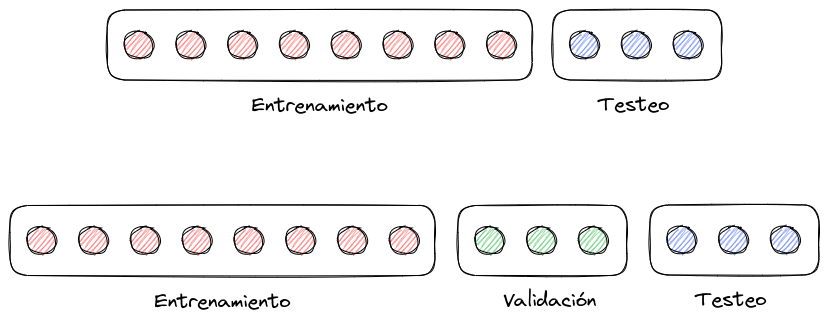

Reservar datos para evaluación también es de fundamental importancia en el caso de competencias (como las [competencias de kaggle](https://www.kaggle.com/competitions)) o si estamos contratando un servicio externo que nos va a proveer un modelo, ya que podremos tener así tener una métrica realmente objetiva.

La cantidad de datos en cada set va a depender del problema a resolver, el modelo y la cantidad de datos que tengamos disponibles. Fracciones comunes para sets de validación suelen ser 66.6%33.3%, 75%/25% y 90%/10%

Afortunadamente no es difícil dividir y mantener organizados los distintos sets como veremos a continuación 

## API de cortes

Algunos datasets de `tfds` ya vienen con subconjuntos de entrenamiento y validación predefinidos. En el caso de `cats_vs_dogs` vimos que solamente había un conjunto que se denominaba `train`. Podemos seleccionar a ese conjunto mediante la keyword "train"

In [9]:
train_data = data["train"]
train_data

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

Alternativamente podemos pedir desde la carga que nos devuelva un split specífico

In [10]:
train_data, info = tfds.load('cats_vs_dogs', split="train", with_info=True)
train_data

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

O incluso solicitar porciones de splits por ejemplo:

 - `'train[123:450]'`
 - `'train[:4000]'`
 - `'train[:75%]'`
 - `'train[25%:75%]'`
 - `'train[:4shard]'`

 Con esto es muy sencillo separar en sets de entrenamiento y validación:

In [11]:
(train_data, validation_data), info = tfds.load('cats_vs_dogs', split=["train[:75%]", "train[75%:]"], with_info=True)

Otras formas de indexación permiten: 

- La unión de divisiones (`'train+test'`, `'train[:25%]+test'`): las divisiones se intercalarán entre sí.
- Obtener el conjunto de datos completo (`'all'`): une todas las divisiones presentes en una sola.

El objeto `info` nos va a permitir acceder al número de de datos presentes, por ejemplo:

In [12]:
info.splits['train'].num_examples

23262

In [13]:
info.splits['train[:75%]'].num_examples

17446

## Reproducibilidad y determinismo

Durante la generación, para una versión determinada del conjunto de datos, TFDS garantiza que los ejemplos se mezclan de forma determinista en el disco. Esto significa que generar el conjunto de datos dos veces (en 2 computadoras diferentes) no cambiará el orden de los ejemplos.

Entonces, la API de subdivisión siempre seleccionará el mismo set de ejemplos.

Sin embargo, el orden en que se leen los ejemplos puede no ser determinista. Esto depende de otros parámetros (por ejemplo, si `shuffle_files=True`)

## Iterando sobre los datasets

Tal vez notaron que la función `tfds.load` no cargó realmente ninguna de las imágenes en memoria, esto se debe a que `tf.data.Dataset` funciona más bien como un generador, el cual va a cargar los datos solamente cuando realmente sea necesario. Esto nos permite trabajar con datasets de tamaño arbitrario y que puedan ser mucho más grande que la memoria RAM disponible. 

Para realmente cargar dato tenemos que iterar sobre el dataset:

In [14]:
ds = train_data.take(5)  # solamente se queda con 5 ejemplos

for example in ds:
    image = example["image"]
    label = example["label"]
    print(image.shape, label)

(262, 350, 3) tf.Tensor(1, shape=(), dtype=int64)
(409, 336, 3) tf.Tensor(1, shape=(), dtype=int64)
(493, 500, 3) tf.Tensor(1, shape=(), dtype=int64)
(375, 500, 3) tf.Tensor(0, shape=(), dtype=int64)
(240, 320, 3) tf.Tensor(1, shape=(), dtype=int64)


2023-07-01 14:28:05.996484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [6]
	 [[{{node Placeholder/_4}}]]
2023-07-01 14:28:05.996779: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int64 and shape [6]
	 [[{{node Placeholder/_4}}]]


Como la salida de los objetos propios de TFDS suele ser un poco verbosa, a veces es conveniente transformar los tensores en matrices de [NumPy](https://numpy.org/) utilizando la función `tfds.as_numpy`.

In [15]:
for example in tfds.as_numpy(ds):
    image = example["image"]
    label = example["label"]
    print(image.shape, label)

(262, 350, 3) 1
(409, 336, 3) 1
(493, 500, 3) 1
(375, 500, 3) 0
(240, 320, 3) 1


NumPy es la biblioteca numérica más importante y utilizada en Python. Tiene una funcionalidad y una API muy parecida a los tensores de TensorFLow. Sin embargo, no utiliza GPU para acelerar el cálculo ni está optimizada para calcular gradientes, que son dos aspectos críticos para el aprendizaje profundo. Por eso vamos a preferir utilizar tensores y funciones de tensorFLow, cuando sea posible.

Si tenemos curiosidad acerca de cuál etiqueta corresponde al número 0 y cuál al número 1 podemos extraer esa información del objeto `info`

In [16]:
labels = info.features["label"]
labels.names

['cat', 'dog']

Finalmente, veamos los datos de las imágenes:

In [17]:
for example in tfds.as_numpy(ds):
    image = example["image"]
    print(image)

[[[242 248 248]
  [240 246 246]
  [235 239 238]
  ...
  [188 174 127]
  [145 133  85]
  [161 149 101]]

 [[238 244 244]
  [239 245 245]
  [235 239 238]
  ...
  [188 176 128]
  [165 153 105]
  [178 168 119]]

 [[237 241 240]
  [238 242 241]
  [232 236 235]
  ...
  [200 187 142]
  [201 191 142]
  [200 192 143]]

 ...

 [[130 122  75]
  [152 146  98]
  [154 148  98]
  ...
  [161 166 136]
  [ 77  86  57]
  [ 71  82  52]]

 [[167 159 112]
  [105  99  51]
  [148 142  92]
  ...
  [ 67  73  45]
  [ 46  56  29]
  [ 41  54  26]]

 [[138 130  83]
  [ 83  77  29]
  [135 129  79]
  ...
  [ 68  74  46]
  [ 14  27   1]
  [ 63  77  51]]]
[[[215 165 114]
  [187 135  85]
  [232 176 129]
  ...
  [ 95  95  23]
  [100 103  32]
  [ 99 105  35]]

 [[228 178 127]
  [197 145  95]
  [243 182 135]
  ...
  [103 103  31]
  [109 110  40]
  [ 99 105  35]]

 [[211 164 110]
  [205 152 100]
  [250 182 135]
  ...
  [ 93  90  21]
  [100 100  30]
  [ 91  94  23]]

 ...

 [[ 89  82  36]
  [ 89  83  33]
  [ 82  77  21]
  ..

## Input pipelines

Como podemos apreciar, nuestras imágenes son todas de tamaños distintos, en principio los modelos va a requerir datos uniformes, así que vamos a necesitar transformarlos. 

Para ello, `tf.data.Dataset` permite definir transformaciones que se van a ir aplicando a cada elemento del dataset. La transformación más general es `map` que permite aplicar una función arbitraría a cada elemento del dataset y devolver un nuevo dataset con los elementos transformados, en el mismo orden en el que aparecían en el dataset original.

Por ejemplo, `map` puede sumar 1 a cada elemento:

In [18]:
import tensorflow as tf

dataset = tf.data.Dataset.range(1, 6)

for example in tfds.as_numpy(dataset):
    print(example)

1
2
3
4
5


In [19]:
new_dataset = dataset.map(lambda x: x + 1)

for example in tfds.as_numpy(new_dataset):
    print(example)

2
3
4
5
6


::: callout-warning

Si, en el código anterior aparecen un montón de WARNING sobre lambda functions, se pueden ignorar. No es un error y es un mensaje superfluo en la mayoría de los casos y que [se solucionó en la versión 2.12.0 de TensorFlow](https://github.com/tensorflow/tensorflow/commit/6197fa37555b710a35e84c1b8e1aab2bcce9d46b)

:::

Noten nuevamente que la transformación no ocurre cuando defino `map` sino recién cuando se realiza la iteración. Esto permite encadenar trasformaciones y generar un pipeline de preprocesamiento.

Empezamos definiendo las funciones que vamos a aplicar:

In [20]:
def select_data(example):
    """ Return an (image, label) tuple """
    return example["image"], example["label"]

def normalize(image, label):
    """ Normalize image: `uint8` -> `float32`."""
    return tf.cast(image, tf.float32) / 255., label
              

def resize(image, label):
    """ Resize the image"""
    image = tf.image.resize(image, [150, 150], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return image, label

Continuamos aplicando las funciones en orden

In [21]:
# full pipeline

ds = train_data
ds = ds.map(select_data)
ds = ds.map(normalize)
ds = ds.map(resize)

Finalmente, nos aseguramos que las imágenes tengan en el tamaño adecuado.

In [22]:
ds = ds.take(5)  # solamente se queda con 5 ejemplos

for image, label in ds:
    print(image.shape, label)

(150, 150, 3) tf.Tensor(1, shape=(), dtype=int64)
(150, 150, 3) tf.Tensor(1, shape=(), dtype=int64)
(150, 150, 3) tf.Tensor(1, shape=(), dtype=int64)
(150, 150, 3) tf.Tensor(0, shape=(), dtype=int64)
(150, 150, 3) tf.Tensor(1, shape=(), dtype=int64)


2023-07-01 14:28:06.608900: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_1' with dtype string and shape [6]
	 [[{{node Placeholder/_1}}]]
2023-07-01 14:28:06.609156: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [6]
	 [[{{node Placeholder/_2}}]]


2023-07-01 14:28:06.683867: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype string and shape [6]
	 [[{{node Placeholder/_2}}]]
2023-07-01 14:28:06.684137: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [6]
	 [[{{node Placeholder/_0}}]]


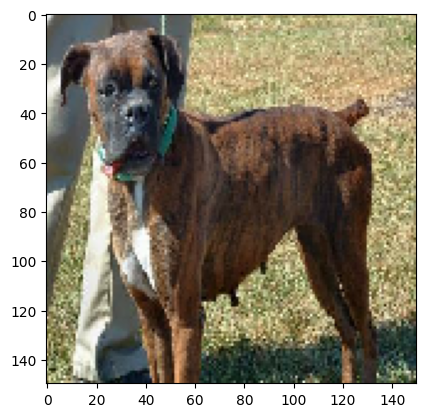

In [23]:
from matplotlib import pyplot as plt

for image, label in tfds.as_numpy(ds.take(1)):
    plt.imshow(image);

Ahora que tenemos una idea clara de cómo trabajar con los datos vamos a implementar nuestros primeros modelos en la próxima sección